In [2]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import pickle

In [3]:
df = pd.read_csv("../data/raw/DC_Properties.csv")

/home/sean/Code/incoming/anaconda3/lib/python3.7/site-packages/IPython/core/interactiveshell.py:3049: DtypeWarning: Columns (18,19,20,21,22,23,24,33,34,35,37,43,45) have mixed types. Specify dtype option on import or set low_memory=False.
  interactivity=interactivity, compiler=compiler, result=result)


In [4]:
df.columns[18]

Index(['Unnamed: 0', 'BATHRM', 'HF_BATHRM', 'HEAT', 'AC', 'NUM_UNITS', 'ROOMS',
       'BEDRM', 'AYB', 'YR_RMDL', 'EYB', 'STORIES', 'SALEDATE', 'PRICE',
       'QUALIFIED', 'SALE_NUM', 'GBA', 'BLDG_NUM', 'STYLE', 'STRUCT', 'GRADE',
       'CNDTN', 'EXTWALL', 'ROOF', 'INTWALL', 'KITCHENS', 'FIREPLACES',
       'USECODE', 'LANDAREA', 'GIS_LAST_MOD_DTTM', 'SOURCE', 'CMPLX_NUM',
       'LIVING_GBA', 'FULLADDRESS', 'CITY', 'STATE', 'ZIPCODE', 'NATIONALGRID',
       'LATITUDE', 'LONGITUDE', 'ASSESSMENT_NBHD', 'ASSESSMENT_SUBNBHD',
       'CENSUS_TRACT', 'CENSUS_BLOCK', 'WARD', 'SQUARE', 'X', 'Y', 'QUADRANT'],
      dtype='object')

In [5]:
df.head()

,Unnamed: 0,BATHRM,HF_BATHRM,HEAT,AC,NUM_UNITS,ROOMS,BEDRM,AYB,YR_RMDL,...,LONGITUDE,ASSESSMENT_NBHD,ASSESSMENT_SUBNBHD,CENSUS_TRACT,CENSUS_BLOCK,WARD,SQUARE,X,Y,QUADRANT
0,0,4,0,Warm Cool,Y,2.0,8,4,1910.0,1988.0,...,-77.040832,Old City 2,040 D Old City 2,4201.0,004201 2006,Ward 2,152,-77.040429,38.914881,NW
1,1,3,1,Warm Cool,Y,2.0,11,5,1898.0,2007.0,...,-77.040764,Old City 2,040 D Old City 2,4201.0,004201 2006,Ward 2,152,-77.040429,38.914881,NW
2,2,3,1,Hot Water Rad,Y,2.0,9,5,1910.0,2009.0,...,-77.040678,Old City 2,040 D Old City 2,4201.0,004201 2006,Ward 2,152,-77.040429,38.914881,NW
3,3,3,1,Hot Water Rad,Y,2.0,8,5,1900.0,2003.0,...,-77.040629,Old City 2,040 D Old City 2,4201.0,004201 2006,Ward 2,152,-77.040429,38.914881,NW
4,4,2,1,Warm Cool,Y,1.0,11,3,1913.0,2012.0,...,-77.039361,Old City 2,040 D Old City 2,4201.0,004201 2006,Ward 2,152,-77.040429,38.914881,NW


In [12]:
pd.to_datetime(df.SALEDATE).max()

Timestamp('2018-07-12 00:00:00')

In [63]:
df['sold_days_before_last_sale'] = pd.to_datetime(df.SALEDATE).max() - pd.to_datetime(df.SALEDATE)

In [64]:
df['sold_days_before_last_sale'].head()

0   5343 days
1   6538 days
2    751 days
3   4383 days
4         NaT
Name: sold_days_before_last_sale, dtype: timedelta64[ns]

In [19]:
df.BATHRM.value_counts()

1     74555
2     53325
3     20785
4      8119
5      1367
6       500
7       129
8        71
0        58
9        22
10       14
11        7
12        3
14        1
13        1
Name: BATHRM, dtype: int64

In [22]:
df.PRICE.head()

0    1095000.0
1          NaN
2    2100000.0
3    1602000.0
4          NaN
Name: PRICE, dtype: float64

In [24]:
df.HF_BATHRM.value_counts()

0     93148
1     59258
2      6186
3       289
4        56
5        12
7         3
6         3
11        1
9         1
Name: HF_BATHRM, dtype: int64

In [25]:
df.BEDRM.value_counts()

3     57864
2     34946
4     24893
1     24181
5      6898
0      5297
6      3090
8       792
7       750
9       123
10       62
12       34
11       13
13        4
15        3
14        2
16        2
20        1
19        1
24        1
Name: BEDRM, dtype: int64

In [26]:
df.KITCHENS.value_counts()

1.0     90434
2.0     11904
4.0      3051
3.0      1173
0.0       117
5.0        11
6.0         4
44.0        1
Name: KITCHENS, dtype: int64

In [27]:
df.ROOMS.value_counts()

6     37259
7     22338
4     20593
3     17759
5     16852
8     16327
9      7616
10     5909
2      5294
12     2929
11     2364
16     1346
13      766
14      595
15      310
20      148
0       138
18      124
1        96
17       77
19       41
21       20
22       10
23       10
24       10
25        6
28        5
27        2
39        2
41        1
34        1
40        1
37        1
35        1
29        1
32        1
31        1
30        1
26        1
48        1
Name: ROOMS, dtype: int64

In [40]:
df.GBA.value_counts().head()

1088.0    1782
1152.0    1661
1024.0    1405
832.0     1364
1280.0    1236
Name: GBA, dtype: int64

In [41]:
df.columns

Index(['Unnamed: 0', 'BATHRM', 'HF_BATHRM', 'HEAT', 'AC', 'NUM_UNITS', 'ROOMS',
       'BEDRM', 'AYB', 'YR_RMDL', 'EYB', 'STORIES', 'SALEDATE', 'PRICE',
       'QUALIFIED', 'SALE_NUM', 'GBA', 'BLDG_NUM', 'STYLE', 'STRUCT', 'GRADE',
       'CNDTN', 'EXTWALL', 'ROOF', 'INTWALL', 'KITCHENS', 'FIREPLACES',
       'USECODE', 'LANDAREA', 'GIS_LAST_MOD_DTTM', 'SOURCE', 'CMPLX_NUM',
       'LIVING_GBA', 'FULLADDRESS', 'CITY', 'STATE', 'ZIPCODE', 'NATIONALGRID',
       'LATITUDE', 'LONGITUDE', 'ASSESSMENT_NBHD', 'ASSESSMENT_SUBNBHD',
       'CENSUS_TRACT', 'CENSUS_BLOCK', 'WARD', 'SQUARE', 'X', 'Y', 'QUADRANT'],
      dtype='object')

In [45]:
df.STORIES.isna().value_counts()

False    106652
True      52305
Name: STORIES, dtype: int64

In [49]:
df.groupby('ZIPCODE')['WARD'].unique()

ZIPCODE
20001.0    [Ward 6, Ward 1, Ward 2, Ward 5]
20002.0            [Ward 6, Ward 5, Ward 7]
20003.0                            [Ward 6]
20004.0                            [Ward 2]
20005.0                            [Ward 2]
20006.0                            [Ward 2]
20007.0                    [Ward 2, Ward 3]
20008.0    [Ward 2, Ward 3, Ward 4, Ward 1]
20009.0                    [Ward 2, Ward 1]
20010.0                    [Ward 1, Ward 4]
20011.0                    [Ward 4, Ward 5]
20012.0                            [Ward 4]
20015.0                    [Ward 3, Ward 4]
20016.0                            [Ward 3]
20017.0                            [Ward 5]
20018.0                            [Ward 5]
20019.0                            [Ward 7]
20020.0                    [Ward 7, Ward 8]
20024.0                            [Ward 6]
20032.0                            [Ward 8]
20036.0                            [Ward 2]
20037.0                            [Ward 2]
20052.0                 

In [54]:
(df.ROOMS - df.BEDRM).isna().value_counts()

False    158957
dtype: int64

In [55]:
df.groupby('WARD')['QUADRANT'].unique()

WARD
Ward 1                [NW]
Ward 2                [NW]
Ward 3                [NW]
Ward 4       [NW, NE, nan]
Ward 5       [NW, NE, nan]
Ward 6    [NW, SW, SE, NE]
Ward 7       [NE, SE, nan]
Ward 8       [SE, SW, nan]
Name: QUADRANT, dtype: object

In [60]:
df['QUADRANT'].isna().value_counts()

False    158720
True        237
Name: QUADRANT, dtype: int64

In [66]:
df['sold_days_before_last_sale'].isna().value_counts()

False    132187
True      26770
Name: sold_days_before_last_sale, dtype: int64

In [69]:
df['PRICE'].isna().value_counts()

False    98216
True     60741
Name: PRICE, dtype: int64

In [70]:
df['NUM_UNITS'].value_counts()

1.0    92491
2.0     9864
4.0     3059
3.0     1101
0.0      168
5.0       10
6.0        3
Name: NUM_UNITS, dtype: int64

In [75]:
h = df[df['NUM_UNITS']==1]

In [78]:
ho = h[~h['PRICE'].isna()]

In [79]:
houses = ho[~ho['sold_days_before_last_sale'].isna()]

In [80]:
len(houses)

49338

In [84]:
houses.NUM_UNITS.value_counts()

1.0    49338
Name: NUM_UNITS, dtype: int64

houses.PRICE needs to be reexpressed.  Displaying without reexpression then trying log.

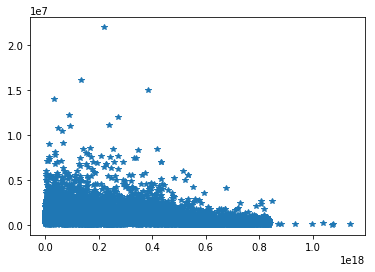

In [90]:
plt.plot(houses.sold_days_before_last_sale, houses.PRICE, '*')

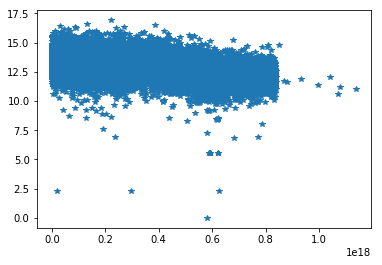

In [89]:
plt.plot(houses.sold_days_before_last_sale, np.log(houses.PRICE), '*')

In [87]:
len(houses[houses['PRICE'] >= 1000000])

5673

In [109]:
Houses = houses[houses.sold_days_before_last_sale < pd.Timedelta(weeks=520)]

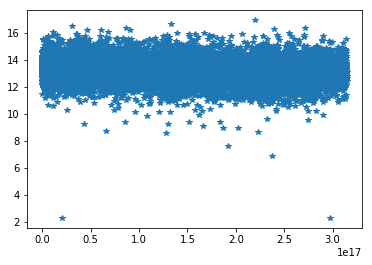

In [111]:
plt.plot(Houses.sold_days_before_last_sale, np.log(Houses.PRICE), '*')

In [114]:
Houses.PRICE.sort_values().head(20)

74419       10.0
81594       10.0
69264     1000.0
96378     2000.0
87541     5185.0
96261     5522.0
68268     5964.0
86612     7500.0
88346     7500.0
60482     9125.0
73991    10000.0
91609    10000.0
89399    12236.0
45044    12261.0
26014    12365.0
68061    14000.0
17936    15000.0
86740    18000.0
52585    20000.0
91997    20750.0
Name: PRICE, dtype: float64

Drop outliers with PRICE less then 5000.  These might have been sweetheart deals that don't reflect true value of home.

In [126]:
HousesWithCheap = houses[houses.sold_days_before_last_sale < pd.Timedelta(weeks=520)]

In [116]:
Houses = Houses[Houses['PRICE']>=5000]

In [117]:
Houses.PRICE.sort_values().head(20)

87541      5185.0
96261      5522.0
68268      5964.0
86612      7500.0
88346      7500.0
60482      9125.0
73991     10000.0
91609     10000.0
89399     12236.0
45044     12261.0
26014     12365.0
68061     14000.0
17936     15000.0
86740     18000.0
52585     20000.0
91997     20750.0
89415     24240.0
55492     25000.0
101928    25007.0
50682     26000.0
Name: PRICE, dtype: float64

In [130]:
HousesWithCheap[HousesWithCheap['PRICE'] < 5000].loc[:,'FULLADDRESS']

69264          3428 9TH STREET NE
74419    1101 HOLBROOK TERRACE NE
81594          320 34TH STREET NE
96378            2902 P STREET SE
Name: FULLADDRESS, dtype: object

All of these houses have estimated values between 300K and 500K on Redfin or Zillow.  OK to eliminate.  There are probably more that can be eliminate.

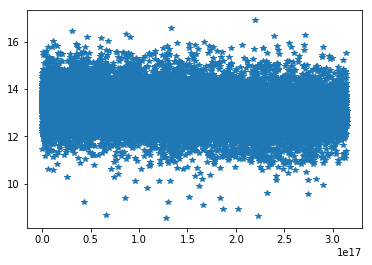

In [118]:
plt.plot(Houses.sold_days_before_last_sale, np.log(Houses.PRICE), '*')

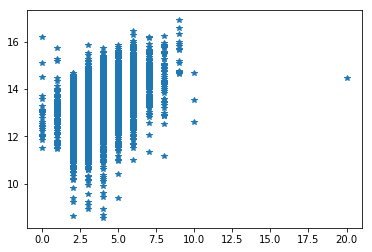

In [122]:
plt.plot(Houses.BEDRM, np.log(Houses.PRICE),'*')

The outlier is real.  Can't eliminate it.  I looked up the address on Redfin.  Cheap for 20 Rooms.

In [124]:
Houses[Houses.BEDRM==20].loc[:,'FULLADDRESS']

3076    1825 13TH STREET NW
Name: FULLADDRESS, dtype: object

In [131]:
Houses['extra_rooms'] = Houses.ROOMS - Houses.BEDRM

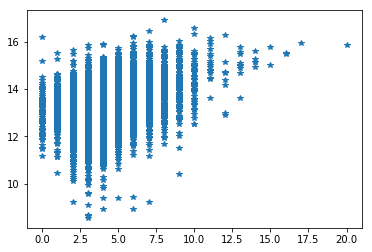

In [133]:
plt.plot(Houses.extra_rooms, np.log(Houses.PRICE), '*')

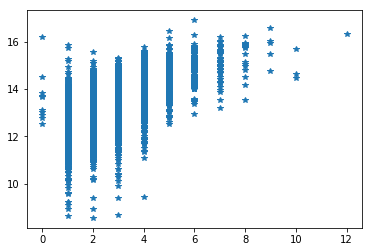

In [134]:
plt.plot(Houses.BATHRM, np.log(Houses.PRICE), '*')

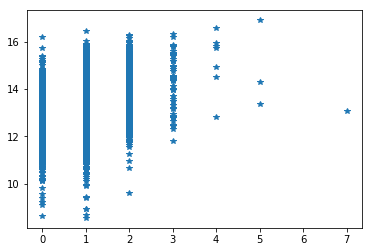

In [136]:
plt.plot(Houses.HF_BATHRM, np.log(Houses.PRICE), '*')